In [4]:
# Atualizando para o novo local organizado
caminho_arquivo = r"E:\Estudos_Cybersecurity\Datasets\NSL-KDD\KDDTrain+.txt"

In [5]:
# %pip install pandas  # (Descomente se der erro de módulo)
import pandas as pd
import os

# --- 1. CAMINHO AJUSTADO (Baseado no seu Dir) ---
# Note a repetição: ...\NSL-KDD\nsl-kdd\KDDTrain+.txt
caminho_arquivo = r"E:\Estudos_Cybersecurity\Datasets_Cybersecurity\NSL-KDD\nsl-kdd\KDDTrain+.txt"

# --- 2. COLUNAS (Essencial para NSL-KDD) ---
colunas = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'difficulty_level'
]

print(f"📂 Lendo de: {caminho_arquivo}")

# --- 3. CARREGAR ---
if os.path.exists(caminho_arquivo):
    df = pd.read_csv(caminho_arquivo, names=colunas, index_col=False)
    print("✅ SUCESSO! Dataset Carregado.")
    print(f"📊 Total de registros: {df.shape[0]}")
    
    # Mostra o topo da tabela
    display(df.head())
else:
    print("❌ Ainda não encontrado.")
    print(f"O Python procurou aqui: {caminho_arquivo}")

📂 Lendo de: E:\Estudos_Cybersecurity\Datasets_Cybersecurity\NSL-KDD\nsl-kdd\KDDTrain+.txt
✅ SUCESSO! Dataset Carregado.
📊 Total de registros: 125973


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


--- 🏆 Placar Geral: Normal vs Ataques ---
class
normal         67343
neptune        41214
satan           3633
ipsweep         3599
portsweep       2931
smurf           2646
nmap            1493
back             956
teardrop         892
warezclient      890
Name: count, dtype: int64

--- 🧮 Estatísticas ---
Total de conexões: 125973
✅ Tráfego Normal:   67343
🚨 Tráfego Hostil:   58630 (46.54%)


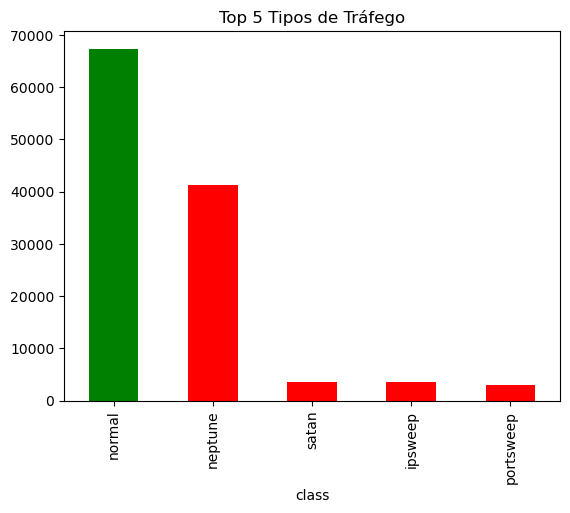

In [6]:
# Analisando a coluna 'class' (o veredito: ataque ou normal)
distribuicao = df['class'].value_counts()

print("--- 🏆 Placar Geral: Normal vs Ataques ---")
print(distribuicao.head(10)) # Mostra o Top 10

print("\n--- 🧮 Estatísticas ---")
total_conexoes = df.shape[0]
total_normal = distribuicao['normal']
total_ataques = total_conexoes - total_normal
pct_ataque = (total_ataques / total_conexoes) * 100

print(f"Total de conexões: {total_conexoes}")
print(f"✅ Tráfego Normal:   {total_normal}")
print(f"🚨 Tráfego Hostil:   {total_ataques} ({pct_ataque:.2f}%)")

# Gráfico rápido para visualizar (Opcional)
import matplotlib.pyplot as plt
distribuicao.head(5).plot(kind='bar', title='Top 5 Tipos de Tráfego', color=['green', 'red', 'red', 'red', 'red'])
plt.show()